In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import h5py
from functools import partial

import time
import numpy as np
import pylab as plt
from scipy.io import loadmat

import train_oct
from cnn_tools import deploy_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
mat_file = '/Users/pekalmj1/Data/Tian_OCT/jbio201500239-sup-0003-Data-S1.mat'
weight_file = "oct_segmentation_fold0_weights_epoch0019.hdf5"

X, Y1, Y2, fold_id = train_oct.tian_load_data(mat_file)
n_classes = np.sum(np.unique(Y1) >= 0)
test_slices = fold_id == 0  # assumes using weights from fold 0

X= X[:, np.newaxis, ...].astype(np.float32)

model = train_oct.create_unet((1, 128, 128), n_classes)
model.load_weights(weight_file)

print('X(all):  ', X.shape, X.dtype, np.min(X), np.max(X))
print('X(test): ', X[test_slices,...].shape)

X:  (50, 1, 496, 768) float32 0.0 255.0
X(test):  (10, 1, 496, 768)


In [22]:
tic = time.time()
Y_hat_oh = deploy_model(X[test_slices,...], model)
toc = time.time() - tic

print('deploy took %0.2f min' % (toc / 60.))

Y_hat = np.argmax(Y_hat_oh, axis=1)

deploy took 0.78 min


(10, 496, 768)
(10, 496, 768)


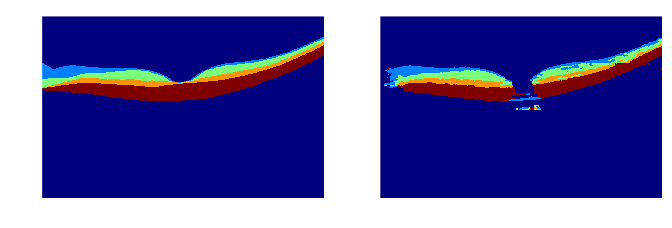

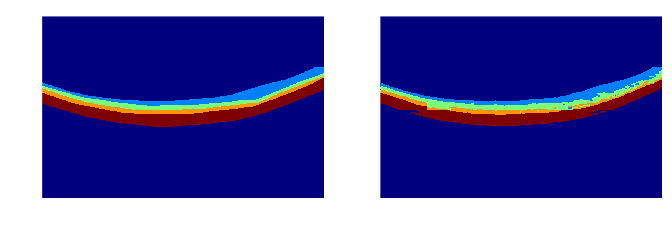

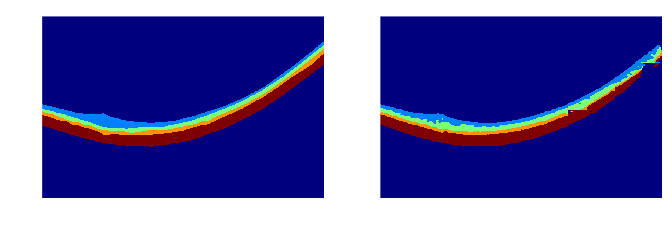

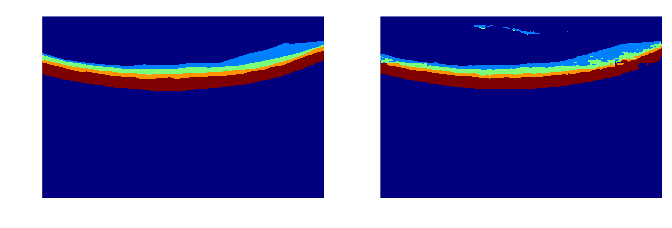

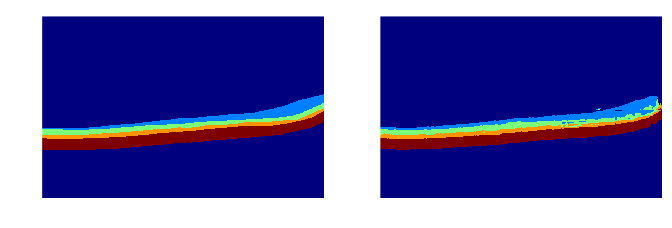

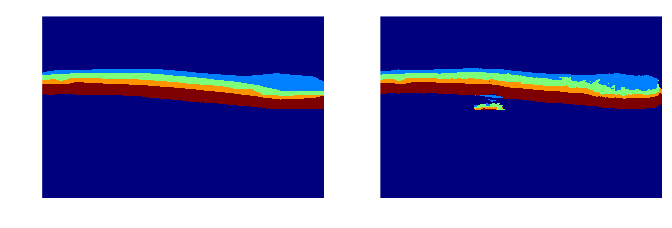

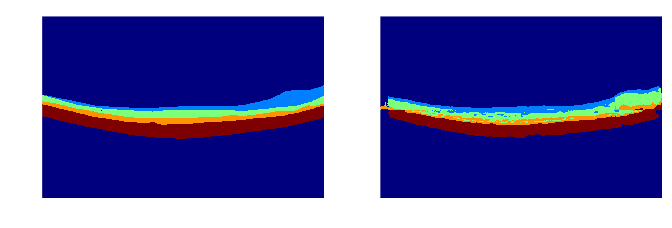

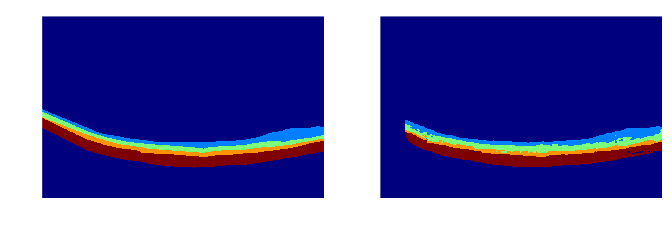

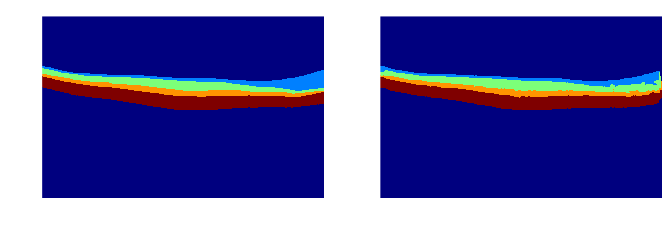

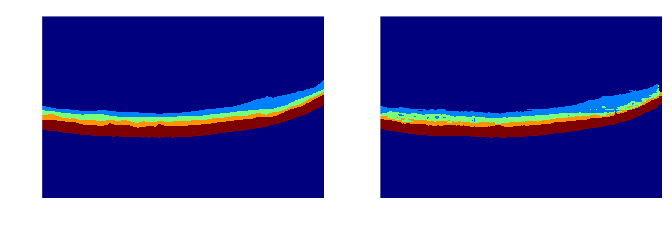

In [35]:
print(Y_hat.shape)

Y1_test = train_oct.tian_dense_labels(Y1, Y_hat.shape[1])
Y1_test = Y1_test[test_slices,...]
print(Y1_test.shape)


for s in range(Y_hat.shape[0]):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.imshow(Y1_test[s,...], interpolation='none')
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(Y_hat[s,...], interpolation='none')
    plt.axis('off')
    plt.show()